# Simple Harmonic Motion [5 marks]

Now we are ready to analyse data from a Simple Harmonic Motion experiment.

You should complete all the tasks in this notebook and use markdown cells to document your work.

## Theoretical Background

![Picture of set-up](shm.png)

A mass is attached to the lower end of a spring and oscillated vertically with simple harmonic motion such that its displacement relative to its mean position, $x$, is given by
$$x = A\sin{\frac{2\pi}{T}t},$$
where $A$ is the maximum displacement and $T$ is the period.

The force, $F$, due to the extension of the spring from its mean position is given by Hooke's Law
$$F = -kx,$$
where $k$ is the spring constant.

The time period of the oscillations is given by
$$T=2\pi\sqrt{\frac{m}{k}}.$$

### Description of Data

The data files you are provided are named `groupA.csv`, `groupB.csv`, etc. and represent experimental data taken with the above set-up, using a $1 kg$ mass, and an ultrasound sensor for distance measurement. Each file contains two columns - the first represents time and the second represents distance. There are five files.

## Tasks

1. Using the variables $A$ and $T$, and the equations provided above, determine the expected motion of a $1 kg$ mass on a spring with spring constant of $1 N/m^2$. For your own choice of $A$ and $T$, plot the ideal displacement of the mass with time, the ideal velocity of the mass with time, and the ideal force due to the extension of the spring. Annotate these plots with the maximum displacement $A$ and period of oscillation $T$.
2. Define a small function that takes two parameters, the period of oscillations $T$ and mass $m$, and returns the spring constant. Run your function on your model from task 1.
3. Load the data from `groupA.csv` and plot the displacement of the mass against time for this real example.
4. Fit appropriate functions to this real data. What are the values of $A$ and $T$ obtained from your fitting? Use your value of T and the function defined in task 2 to determine the spring constant $k$ from the experimental measurements.
5. Calculate the $\chi^2$ value of your fit functions.
6. Use a loop to read in the data from all five files, fit appropriate functions, determine $A$, $T$ and $k$ and determine the mean (with uncertainty) value of $k$. Comment on whether the experimental uncertainty is reasonable? (3 marks)

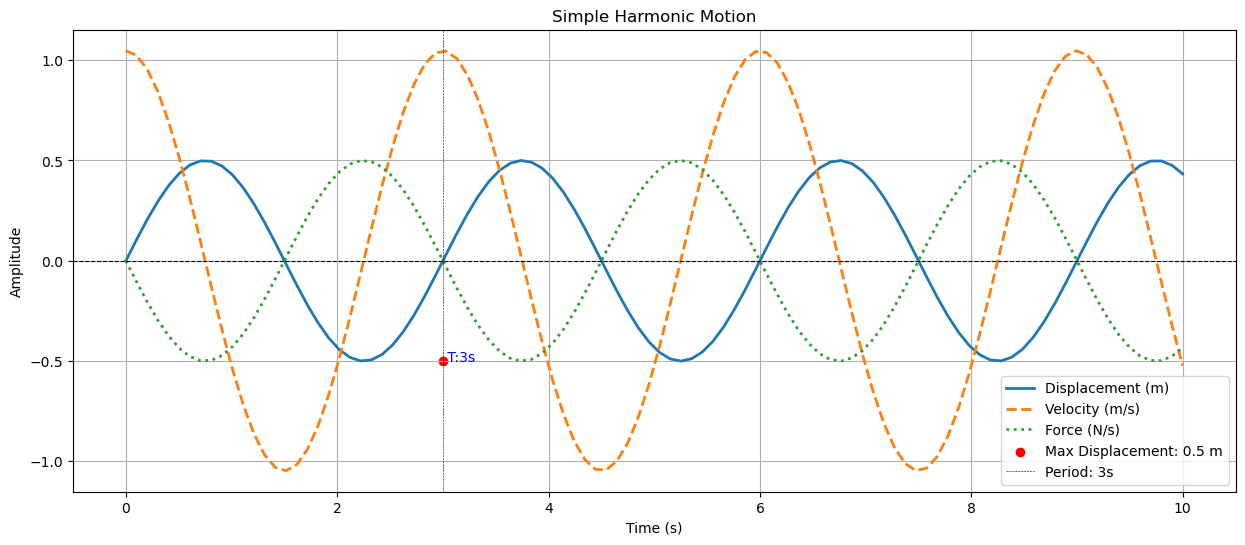

In [316]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy import optimize


#define values
A = 0.5
T = 3
k = 1
m = 1


#function for ideal motion
def motion(A, T, k):

    t = np.linspace(0, 10, 100) #creates values for time from 0s to 10s

    # Calculations for displacement (x), velocity (v), and force (f)
    x = A * np.sin(2 * np.pi * t / T)  
    v = (2 * np.pi * A / T) * np.cos(2 * np.pi * t / T)  
    F = -k * x 

    # Plot
    plt.figure(figsize=(15, 6))
    plt.plot(t, x, label="Displacement (m)", linewidth=2)
    plt.plot(t, v, label="Velocity (m/s)", linestyle="--", linewidth=2)
    plt.plot(t, F, label="Force (N/s)", linestyle=":", linewidth=2)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

    # Annotate maximum displacement and period
    plt.scatter([T], [-A], color='red', label=f"Max Displacement: {A:.3g} m")
    plt.axvline(T, color='black', linewidth=0.4, linestyle='--', label=f'Period: {T:.3g}s')
    plt.text(T, -A, f" T:{T:.3g}s", fontsize=10, color='blue')

    #lables for plot
    plt.title("Simple Harmonic Motion")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()


# run the function
motion(A, T, k)

In [318]:
# A function to calculate a springs constant from the mass and period
def calc_spring_cons(m, T):
    return((4 * np.pi**2 * m) / T**2)


print(f'With mass: {m} kg and Period: {T} s \nThe Spring constant is: {calc_spring_cons(m, T):.3g} N/m')


With mass: 1 kg and Period: 3 s 
The Spring constant is: 4.39 N/m



Initial Starting Values:
Amplitude (m): 0.277, Period (s): 0.506

x² of Group A: 0.02


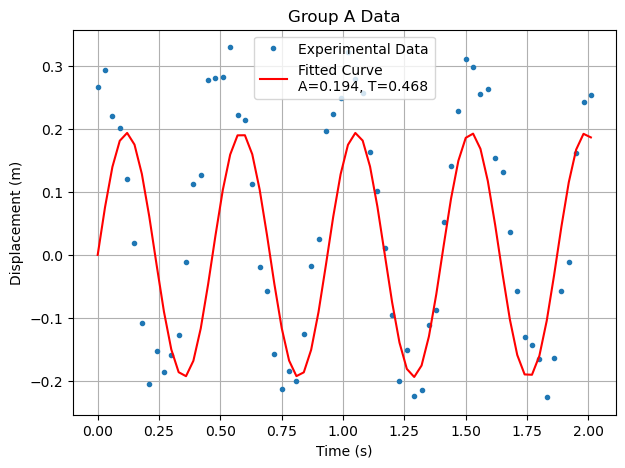


Initial Starting Values:
Amplitude (m): 0.303, Period (s): 0.489

x² of Group B: 0.02


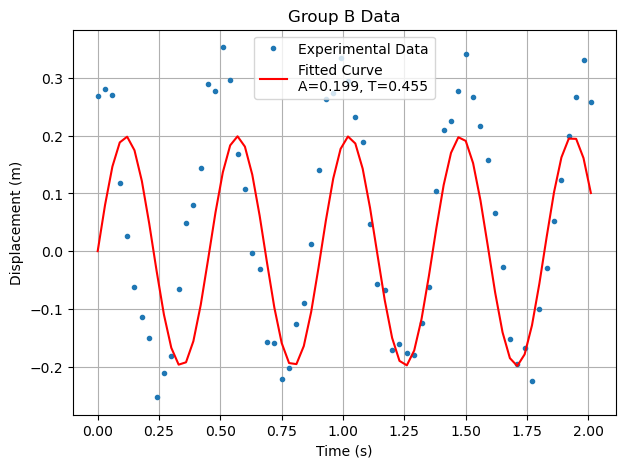


Initial Starting Values:
Amplitude (m): 0.292, Period (s): 0.471

x² of Group C: 0.02


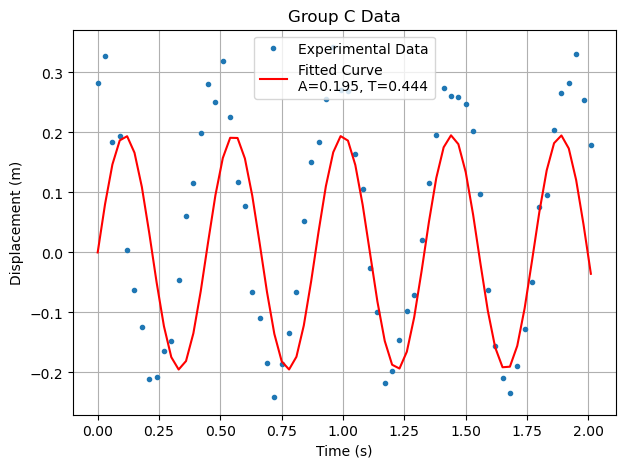


Initial Starting Values:
Amplitude (m): 0.298, Period (s): 0.506

x² of Group D: 0.02


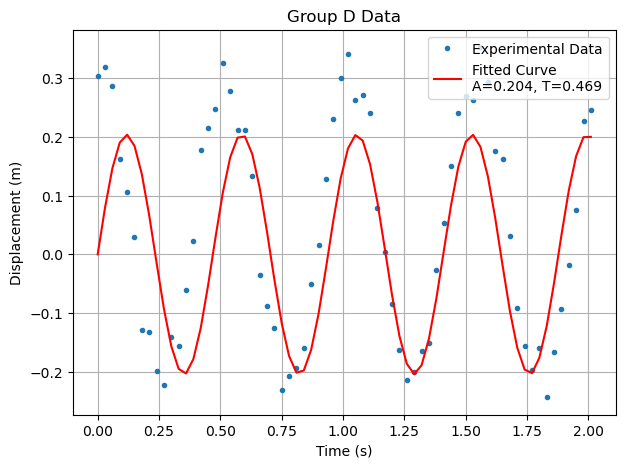


Initial Starting Values:
Amplitude (m): 0.228, Period (s): 0.506

x² of Group E: 0.01


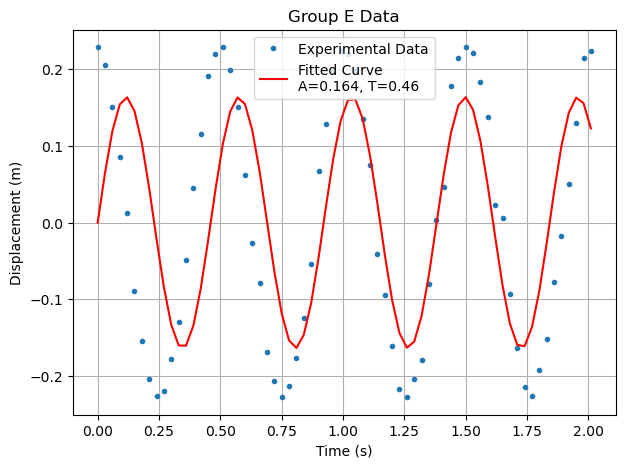


Analysis Results (3dp):

      Group   A(m)   T(s)   k(N/m)     X²
0  Group A  0.194  0.468  180.148  0.014
1  Group B  0.199  0.455  190.520  0.019
2  Group C  0.195  0.444  200.451  0.020
3  Group D  0.204  0.469  179.097  0.020
4  Group E  0.164  0.460  186.177  0.019

Spring Constant Analysis

Mean Spring Constant (k): 187.279 N/m
Uncertainty in Spring Constant:7.785 N/m


In [466]:
#function of the displacement function
def waveform(t, A, T):
    return A * np.sin(2*np.pi * t / T)  #displacement relative to its mean position
    
#file path array 
file_paths = {
    "Group A": "groupA.csv",
    "Group B": "groupB.csv",
    "Group C": "groupC.csv",
    "Group D": "groupD.csv",
    "Group E": "groupE.csv"}

#results array
results = []

#main loop
for group, path, in file_paths.items():

    #loads and sorts data
    data = pd.read_csv(path)
    time = data["Time/s"].values
    displacement = data["Distance/m"].values
    
    #takes data sets and forms starting value for A and T
    initial_A = (max(displacement) - min(displacement)) / 2  # Half the range of displacement
    time_diff = np.diff(time[np.where(np.diff(np.signbit(displacement)))[0]])  # Estimate period from zero crossings
    initial_T = 2 * np.mean(time_diff) if len(time_diff) > 0 else (time[-1] - time[0])  # Fallback to total time range
    initial_approximation = [initial_A, initial_T]
    print(f"\033[1m\nInitial Starting Values:\033[0m\nAmplitude (m): {initial_A:.3g}, Period (s): {initial_T:.3g}")

    #curvefit
    params, params_convariance = optimize.curve_fit(waveform, time, displacement, p0= initial_approximation)
    A_fitted, T_fitted = params

    k_fitted = calc_spring_cons(m, T_fitted) #spring constant calc.
    
    #rounded values for print
    a_rounded = np.round(A_fitted, decimals = 3)
    t_rounded = np.round(T_fitted, decimals = 3)
    k_rounded = np.round(k_fitted, decimals = 3)
    chiSquared_rounded = np.round(chiSquared, decimals = 3)
    
    #adds values to results table
    results.append({'Group': group, 'A(m)': a_rounded, 'T(s)': t_rounded, 'k(N/m)': k_rounded, 'X\u00b2': chiSquared_rounded})

    #fitted displacement function
    fitted_displacement = waveform(time, A_fitted, T_fitted)

    #needs fixed
    sigma=k_std
    chiSquared = np.sum((displacement - fitted_displacement)**2 / sigma**2)
    print('\033[1m\nx\u00b2 of {1}\033[0m: {0:.2f}'.format(chiSquared, group))

    #graphing set up
    plt.figure(figsize=(7, 5))
    plt.plot(time, displacement, label="Experimental Data", marker='o', linestyle='none', markersize=3)
    plt.plot(time, fitted_displacement, label=f"Fitted Curve\nA={A_fitted:.3g}, T={T_fitted:.3g}", color='red')
    plt.title(f"{group} Data")
    plt.xlabel("Time (s)")
    plt.ylabel("Displacement (m)")
    plt.legend()
    plt.grid(True)
    plt.show()

#Tablulated results
results_df = pd.DataFrame(results)
print('\033[1m\nAnalysis Results (3dp):\033[0m')
print('\n',results_df)

#spring constant mean and uncertainty 
k_values = [result["k(N/m)"] for result in results]
k_mean = np.mean(k_values)
k_std = np.std(k_values)
print('\033[1m\nSpring Constant Analysis\033[0m')
print(f'\nMean Spring Constant (k): {k_mean:.3f} N/m')
print(f'Uncertainty in Spring Constant:{k_std:.3f} N/m')
    